# Scikit-learn
Scikit-learn is an open source data analysis library for Machine Learning (ML) with Python.
It includes Algorithmic decision-making methods:
* Classification: identifying and categorizing data based on patterns.
* Regression: predicting data values on the average mean of exsiting and planned data.
* Clustering: automatic grouping of similar data into datasets.

[link](https://scikit-learn.org/stable/)

#Data Preparation With Train and Test Sets
Evaluate a logistic regression model using train and test sets on a synthetic
binary classification dataset where the input variables have been normalized.

use the make classification() function in sklearn to create the dataset
with 1,000 rows of data and 20 numerical input features. 


In [22]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
random_state=7)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


* The input part of the dataset has 1,000 rows and 20 columns for the 20 input variables 
* The output variable has 1,000 examples to match the 1,000 rows of input data, 

In [23]:
X[0][0], y[0]
X[:5]

array([[ 2.92994904e-01, -4.21223056e+00, -1.28833200e+00,
        -2.17849815e+00, -6.45276650e-01,  2.58097719e+00,
         2.84223878e-01, -7.18279280e+00, -1.91211104e+00,
         2.73729512e+00,  8.13956945e-01,  3.96973717e+00,
        -2.66939799e+00,  3.34692332e+00,  4.19791821e+00,
         9.99909984e-01, -3.02018750e-01, -4.43170633e+00,
        -2.82646737e+00,  4.49168082e-01],
       [-6.83990068e-02,  5.51884147e+00,  1.12389773e+01,
        -5.03969992e+00, -2.08678427e+00,  2.14968460e+00,
         5.59734187e-01,  1.51137767e+01, -3.07183375e+00,
        -2.57458353e+00,  3.32457612e+00,  2.06754191e+00,
        -5.24925807e+00, -2.15449971e+00,  4.93109130e+00,
         1.29673535e+00, -3.18613337e+00, -3.08994781e+00,
         1.19029898e+00,  1.62025622e+00],
       [ 7.31616218e-01, -6.84686328e-01, -9.81741943e-01,
        -2.55246528e+00, -5.27030762e+00, -1.56149846e+00,
        -1.16926915e+00, -2.10408711e+00, -1.13113880e+00,
         4.65477500e+00, -2.7

* 1. Normalize the input variables using the MinMaxScaler class, which scales the data to the range 0-1.
* 2. Apply the fit transform() function on the dataset

In [24]:
from sklearn.preprocessing import MinMaxScaler
# standardize the dataset
scaler = MinMaxScaler()
X = scaler.fit_transform(X) #scales data 0-1
X[0]

array([0.47831936, 0.18693602, 0.42403057, 0.42931963, 0.58533255,
       0.67424929, 0.529972  , 0.31480621, 0.39374285, 0.72749419,
       0.51740542, 0.53017703, 0.2799069 , 0.63190289, 0.74417484,
       0.5808874 , 0.5110039 , 0.2731369 , 0.34014356, 0.54389622])

* split the dataset into train and test sets using the split() function.
* use 67% for the training set and 33% for the test set.

In [31]:
from sklearn.model_selection import train_test_split
# split into train test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((670, 20), (330, 20), (670,), (330,))

define the logistic regression algorithm via the LogisticRegression class, and fit it on the training dataset.

In [35]:
from sklearn.linear_model import LogisticRegression
# fit the model
model = LogisticRegression()
model.fit(X_train, y_train)
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

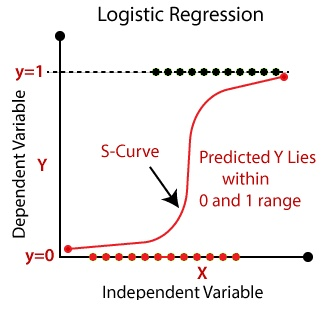

* use the fit model to make a prediction using the input data from the test set
* then compare the predictions to the expected values and calculate a classification accuracy score.

In [41]:
from sklearn.metrics import accuracy_score

# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy*100), "%")

Accuracy: 84.848 %


In [44]:
#the complete example
# naive approach to normalizing the data before splitting the data and evaluating the model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
random_state=7)
# standardize the dataset
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LogisticRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy*100), "%")

Accuracy: 84.848 %


# The Problem in above approach
Due to possibls data leakage, the estimate of model accuracy
is wrong.
Hence, we perform fit operstion of data preparatiin first on the training set, then apply the transform to the train and test sets.

This requires that we first split the data into train and tests.


In [45]:
# correct approach for normalizing the data after the 
#data is split before the model is evaluated

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
random_state=7)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# define the scaler
scaler = MinMaxScaler()
# fit on the training dataset
scaler.fit(X_train)
# scale the training dataset
X_train = scaler.transform(X_train)
# scale the test dataset
X_test = scaler.transform(X_test)
# fit the model
model = LogisticRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy*100), "%")

Accuracy: 85.455 %


#Data Preparation With k-fold Cross-Validation
Here we split thd dataset into multple sets and use each as a training set and otbers as test set. it ebables all observations to bein a training set.

In [47]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
random_state=7)

# define the pipeline
steps = list()
steps.append(('scaler', MinMaxScaler()))
steps.append(('model', LogisticRegression()))
pipeline = Pipeline(steps=steps)
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model using cross-validation
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores)*100, std(scores)*100))

Accuracy: 85.433 (3.471)
